# Livrable 2 

## Introduction

Dans le cadre de notre engagement continu envers des solutions de mobilité urbaine durable, ce livrable se concentre sur l'avancement de notre projet initié en réponse à l'appel de l'Agence de l’Environnement et de la Maîtrise de l’Énergie (ADEME). L'objectif principal reste de développer des méthodes efficaces pour optimiser les tournées de livraison en milieu urbain, en réduisant la consommation énergétique et les émissions de CO2, tout en maintenant ou en améliorant les niveaux de service.

### Contexte

La nécessité de solutions innovantes pour la gestion de la logistique urbaine devient de plus en plus impérative face aux défis environnementaux actuels. Les villes, confrontées à l'augmentation des coûts de transport et aux impacts environnementaux néfastes, cherchent des moyens de gérer efficacement le trafic et de réduire les émissions polluantes. Notre projet vise à répondre à ces défis en utilisant des techniques algorithmiques avancées pour planifier de manière optimale les tournées des véhicules de livraison.

### Objectifs du Livrable

Ce deuxième livrable vise à étendre notre modèle initial en intégrant des algorithmes plus sophistiqués et des heuristiques pour améliorer la résolution du problème de tournées de véhicules (Vehicle Routing Problem, VRP). Nous explorerons comment différentes approches peuvent contribuer à une plus grande efficacité logistique et à une réduction des impacts environnementaux :
- **Développement et implémentation de nouveaux algorithmes** : Nous introduirons de nouvelles méthodes de résolution qui prennent en compte des contraintes additionnelles telles que les fenêtres de temps et les capacités variables des véhicules.
- **Analyse de la complexité et optimisation des performances** : Évaluation de la complexité des nouvelles approches et optimisation de leur performance pour des instances de grande taille.
- **Validation expérimentale** : Tests des algorithmes sur des scénarios réalistes pour valider leur efficacité et leur applicabilité en conditions réelles.

L'accent sera mis sur la robustesse des solutions proposées et leur capacité à s'adapter à diverses conditions opérationnelles, en visant une amélioration tangible des performances par rapport aux solutions existantes.

### Choix des Algorithmes

Nous avons sélectionné trois algorithmes distincts pour aborder le problème des tournées de véhicules (VRP) : l'algorithme de PSO (Particle Swarm Optimization), l'algorithme de Dijkstra et l'optimisation avec PuLP et le solveur Simplex. Ce choix repose sur plusieurs considérations :
1. **Complémentarité des Méthodes** : Chaque algorithme apporte des forces différentes. PSO est efficace pour trouver rapidement des solutions de bonne qualité pour des instances de taille moyenne à grande, Dijkstra est utile pour déterminer les chemins les plus courts, et PuLP avec le solveur Simplex permet de vérifier la qualité des solutions trouvées par les heuristiques en fournissant des solutions optimales pour des instances plus petites.
2. **Robustesse et Flexibilité** : En utilisant une combinaison de méthodes heuristiques et exactes, nous pouvons obtenir des solutions robustes et flexibles qui s'adaptent à divers scénarios et contraintes logistiques.
3. **Validation et Comparaison** : L'utilisation de plusieurs algorithmes permet de valider les résultats obtenus, d'identifier les points forts et les faiblesses de chaque méthode, et d'améliorer continuellement les approches.


## Développement Algorithmique

Dans cette section, nous abordons les détails techniques des algorithmes développés pour optimiser les tournées de livraison. Nous intégrons des contraintes complexes comme les fenêtres de temps, la capacité des véhicules, et les variations du trafic, afin de proposer des solutions qui maximisent l'efficience tout en minimisant l'impact environnemental.

#### Description des Algorithmes

**1. Algorithme de Planification Basé sur le VRP (Vehicle Routing Problem) avec PSO**

- **Objectif** : Minimiser le coût total des tournées, incluant la distance parcourue et le temps de trajet, en tenant compte des contraintes de capacité et de fenêtre temporelle.
- **Méthode** : Utilisation de l'algorithme génétique combiné à des techniques d'optimisation par essaim particulaire (PSO) pour explorer efficacement l'espace des solutions.
- **Pseudocode** : Initialiser la population de solutions 
Tant que le critère de convergence n'est pas atteint :
  Évaluer la fitness de chaque individu
  Sélectionner les meilleurs individus pour la reproduction
  Appliquer les opérations de croisement et de mutation
  Former la nouvelle génération
  Appliquer l'optimisation par essaim particulaire pour affiner les solutions
Retourner la meilleure solution trouvée

**2. Algorithme de Minimisation du Temps de Parcours Basé sur Dijkstra**

- **Objectif** : Optimiser le chemin de chaque véhicule en minimisant le temps de parcours, sous contrainte de capacité et de fenêtre de livraison.
- **Méthode** : Utilisation de l'algorithme de Dijkstra modifié pour prendre en compte les fenêtres de temps et les priorités de livraison.
- **Pseudocode** :Pour chaque véhicule :
Dijkstra_modifié(origine, destination)
Tant qu'il reste des destinations non visitées :
Sélectionner la prochaine destination basée sur la fenêtre de temps la plus proche
Mettre à jour le chemin et le coût total
Ajouter le retour à l'origine
Évaluer le coût total de la tournée

**3. Optimisation avec PuLP et le Solveur Simplex**
- **Objectif** : Trouver des solutions optimales pour les tournées de véhicules en minimisant la distance totale parcourue.
- **Méthode** : Modélisation du problème avec PuLP et résolution à l'aide du solveur Simplex.
- **Pseudocode** : Définir les variables de décision et les contraintes du problème
Formuler la fonction objectif (minimisation de la distance totale)
Résoudre le problème avec le solveur Simplex
Extraire et retourner les routes optimales


#### Intégration des Contraintes
- **Fenêtres de Temps** : Chaque livraison doit être réalisée dans une fenêtre temporelle spécifique, ce qui requiert une planification précise du timing des tournées.
- **Capacité des Véhicules** : Les véhicules ont une capacité maximale qu'ils ne peuvent dépasser, ce qui influence directement l'ordre et la quantité des livraisons.
- **Variations du Trafic** : Les algorithmes doivent être capables de s'adapter en temps réel aux variations du trafic pour rerouter les véhicules de manière optimale.

### Analyse de la Complexité

L'analyse de la complexité des algorithmes développés est cruciale pour évaluer leur efficacité et leur faisabilité pour des instances de taille réelle.

#### Complexité Temporelle

**1. Algorithme génétique combiné à l'optimisation par essaim particulaire (PSO)**

- **Complexité Temporelle** : L'algorithme génétique a une complexité temporelle de `O(g*(s*log(s) + k*c))`, où `g` est le nombre de générations, `s` est la taille de la population, `k` est le nombre de véhicules, et `c` est le coût de calcul de la fitness d'une solution. L'optimisation par essaim particulaire ajoute une complexité de `O(p*i)`, où `p` est le nombre de particules et `i` le nombre d'itérations pour chaque particule.

**2. Algorithme de Dijkstra modifié pour les contraintes de fenêtre de temps**

- **Complexité Temporelle** : La modification de l'algorithme de Dijkstra pour inclure les fenêtres de temps et les capacités des véhicules augmente sa complexité à `O((V+E)*log(V))` pour chaque véhicule, où `V` est le nombre de sommets et `E` est le nombre d'arêtes dans le graphe.

#### Complexité Spatiale

**1. Algorithme génétique et PSO**

- **Complexité Spatiale** : La complexité spatiale est dominée par le stockage des populations de solutions, soit `O(s*k)`, où `s` est la taille de la population et `k` est le nombre de véhicules.

**2. Algorithme de Dijkstra modifié**

- **Complexité Spatiale** : Nécessite de stocker le graphe et les états intermédiaires pour chaque véhicule. La complexité est donc de `O(V+E)` pour le stockage du graphe plus `O(V)` pour les états de Dijkstra.

### Implications Pratiques

Ces complexités indiquent que bien que les algorithmes soient efficaces pour des petites à moyennes instances, leur coût peut devenir prohibitif pour de très grandes instances avec de nombreux véhicules et une grande densité de réseau. L'optimisation des performances par des techniques telles que le parallélisme ou l'utilisation de heuristiques supplémentaires peut être nécessaire pour rendre ces algorithmes pratiques à plus grande échelle. L'utilisation d'heuristiques peut également aider à réduire le temps de calcul en fournissant de bonnes solutions de départ qui nécessitent moins d'itérations pour converger.

## Implémentation

L'implémentation des algorithmes choisis pour le projet est réalisée en Python, utilisant principalement les bibliothèques NetworkX pour la gestion des graphes et NumPy pour les calculs numériques. Voici les détails de l'implémentation de chaque algorithme abordé dans la section précédente.

In [52]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


### Génération et Modélisation du Graphe en mode aléatoire

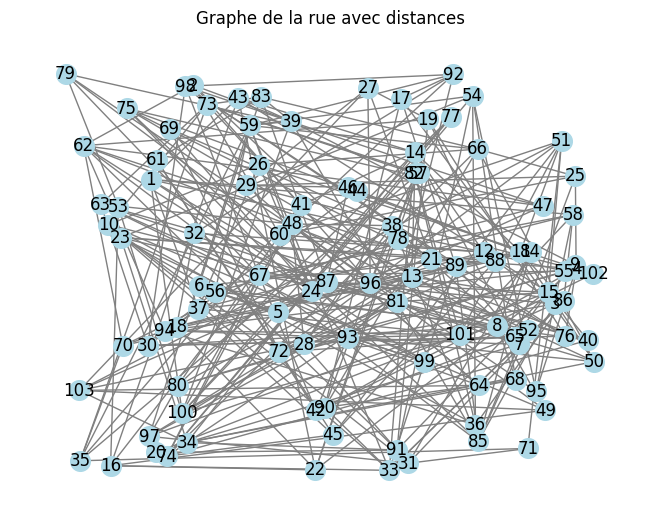

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

# Création du graphe
G = nx.Graph()

# Ajout des utilisateurs
randomNumber = random.randint(100, 120)
users = list(range(1, randomNumber + 1))

# Ajout des nœuds dans le graphe
G.add_nodes_from(users)

# Génération des positions aléatoires pour les utilisateurs
positions = {user: (random.uniform(0, 200), random.uniform(0, 200)) for user in users}

# Ajout des amitiés avec distances basées sur les positions
for i in range(randomNumber):
    numFriends = random.randint(1, 5)  # Chaque utilisateur aura entre 1 et 5 amis
    for _ in range(numFriends):
        while True:
            friend = random.randint(1, randomNumber)
            if friend != i + 1 and not G.has_edge(i + 1, friend):
                # Calcul de la distance euclidienne entre les positions
                pos_i = positions[i + 1]
                pos_friend = positions[friend]
                distance = np.sqrt((pos_i[0] - pos_friend[0]) ** 2 + (pos_i[1] - pos_friend[1]) ** 2)
                G.add_edge(i + 1, friend, weight=distance)
                break

# Visualisation du graphe
nx.draw(G, positions, with_labels=True, node_color='lightblue', node_size=200, edge_color='gray')
plt.title("Graphe de la rue avec distances")
plt.show()

# Calcul de la matrice des distances
distances = nx.floyd_warshall_numpy(G)
# print("Matrice des distances:\n", distances)



### Génération et Modélisation du Graphe

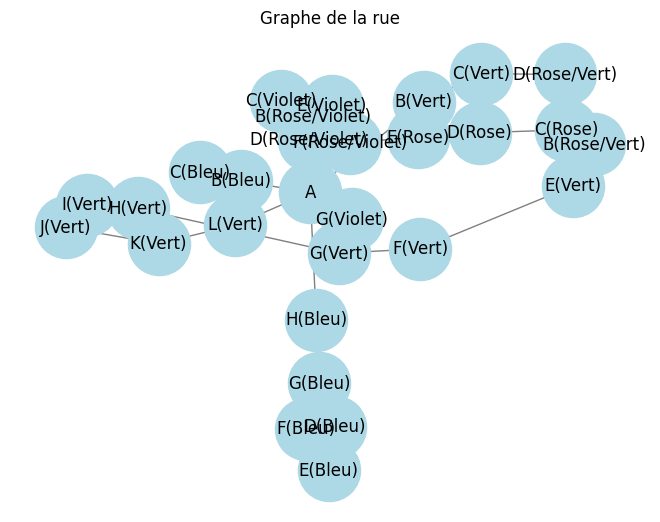

Matrice des distances:
 [[ 0.  7. 16. 16.  9. 11.  4. 16. 25. 25. 15. 13.  2. 10. 23. 24. 30. 31.
  22. 13. 11.  6.  3. 13. 21. 24. 22. 14.  5.]
 [ 7.  0. 10. 13.  6.  4. 11.  9. 18. 21. 22. 20.  9. 17. 30. 31. 37. 38.
  29. 20. 18. 13. 10. 20. 28. 31. 29. 21. 12.]
 [16. 10.  0.  6.  7. 14. 20. 19. 28. 31. 31. 29. 18. 26. 39. 40. 46. 47.
  38. 29. 27. 22. 19. 29. 37. 40. 38. 30. 21.]
 [16. 13.  6.  0.  7. 16. 20. 22. 31. 34. 31. 29. 18. 26. 39. 40. 46. 47.
  38. 29. 27. 22. 19. 29. 37. 40. 38. 30. 21.]
 [ 9.  6.  7.  7.  0.  9. 13. 15. 24. 27. 24. 22. 11. 19. 32. 33. 39. 40.
  31. 22. 20. 15. 12. 22. 30. 33. 31. 23. 14.]
 [11.  4. 14. 16.  9.  0. 15. 13. 22. 25. 26. 24. 13. 21. 34. 35. 41. 42.
  33. 24. 22. 17. 14. 24. 32. 35. 33. 25. 16.]
 [ 4. 11. 20. 20. 13. 15.  0. 20. 29. 29. 19. 17.  6. 14. 27. 28. 34. 35.
  26. 17. 15. 10.  7. 17. 25. 28. 26. 18.  9.]
 [16.  9. 19. 22. 15. 13. 20.  0.  9. 12. 22. 24. 18. 26. 30. 31. 37. 38.
  38. 29. 27. 22. 19. 29. 37. 40. 38. 30. 21.]
 [25. 18

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import heapq
import pulp

# Génération du graphe initial
G = nx.Graph()

users = ["A", "F(Rose/Violet)", "B(Rose/Violet)", "C(Violet)", "D(Rose/Violet)", "E(Violet)", "F(Rose/Violet)", "G(Violet)",
         "E(Rose)","D(Rose)","C(Rose)","B(Rose/Vert)","D(Rose/Vert)",
         "B(Vert)","C(Vert)","E(Vert)","F(Vert)","G(Vert)","H(Vert)","I(Vert)","J(Vert)","K(Vert)","L(Vert)",
         "H(Bleu)","G(Bleu)","F(Bleu)","E(Bleu)","D(Bleu)","C(Bleu)","B(Bleu)"]
G.add_nodes_from(users)

friendships = [("A", "F(Rose/Violet)"), ("A", "B(Vert)"), ("A", "L(Vert)"),("A", "H(Bleu)"),("A", "B(Bleu)"),("A", "D(Rose/Violet)"),("A", "G(Violet)"),
               ("F(Rose/Violet)", "B(Rose/Violet)"), ("B(Rose/Violet)", "C(Violet)"), ("B(Rose/Violet)", "D(Rose/Violet)"), ("C(Violet)", "D(Rose/Violet)"),
               ("D(Rose/Violet)", "E(Violet)"), ("E(Violet)", "F(Rose/Violet)"),("D(Rose/Violet)", "F(Rose/Violet)"),("F(Rose/Violet)","E(Rose)"),
               ("E(Rose)","D(Rose)"),("D(Rose)","C(Rose)"),("C(Rose)","B(Rose/Vert)"),
               ("B(Rose/Vert)", "D(Rose/Vert)"), ("D(Rose/Vert)", "C(Vert)"), ("C(Vert)", "B(Vert)"),
               ("L(Vert)", "K(Vert)"), ("K(Vert)", "J(Vert)"), ("J(Vert)", "I(Vert)"), ("I(Vert)", "H(Vert)"), 
               ("H(Vert)", "G(Vert)"), ("G(Vert)", "F(Vert)"), ("F(Vert)", "E(Vert)"), ("E(Vert)", "B(Rose/Vert)"),
               ("H(Bleu)", "G(Bleu)"),("G(Bleu)", "F(Bleu)"),("F(Bleu)", "E(Bleu)"),("E(Bleu)", "D(Bleu)"),
               ("D(Bleu)", "G(Bleu)"),("C(Bleu)", "B(Bleu)"),
               ]

G.add_edges_from(friendships)

# Ajouter des poids aux arêtes
for (u, v) in G.edges():
    G.edges[u, v]['weight'] = random.randint(1, 10)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, edge_color='gray')
plt.title("Graphe de la rue")
plt.show()

# Calcul de la matrice des distances
distances = nx.floyd_warshall_numpy(G)
print("Matrice des distances:\n", distances)


### PSO (Particle Swarm Optimization) pour le TSP (Traveling Salesman Problem)

In [7]:
class Particle:
    def __init__(self, position):
        self.position = position
        self.velocity = np.zeros_like(position)
        self.best_position = position.copy()
        self.best_score = float('inf')

def initialize_population(size, num_cities):
    population = []
    for _ in range(size):
        position = np.random.permutation(num_cities)
        population.append(Particle(position))
    return population

def calculate_route_cost(route, distances):
    cost = 0
    for i in range(len(route)):
        cost += distances[route[i], route[(i + 1) % len(route)]]
    return cost

def update_velocity_and_position(particle, global_best_position, w=0.1, c1=0.5, c2=0.9):
    r1, r2 = random.random(), random.random()
    cognitive_component = c1 * r1 * (particle.best_position - particle.position)
    social_component = c2 * r2 * (global_best_position - particle.position)
    particle.velocity = w * particle.velocity + cognitive_component + social_component
    particle.position = np.mod(particle.position + particle.velocity.astype(int), len(particle.position))

def pso(distances, num_iterations):
    num_cities = distances.shape[0]
    population = initialize_population(30, num_cities)
    global_best_position = None
    global_best_score = float('inf')

    for _ in range(num_iterations):
        for particle in population:
            cost = calculate_route_cost(particle.position, distances)
            if cost < particle.best_score:
                particle.best_score = cost
                particle.best_position = particle.position.copy()
            if cost < global_best_score:
                global_best_score = cost
                global_best_position = particle.position.copy()
        for particle in population:
            update_velocity_and_position(particle, global_best_position)

    best_route_indices = global_best_position
    best_route_names = [list(G.nodes)[i] for i in best_route_indices]
    return best_route_names, global_best_score

best_route, best_distance = pso(distances, 100)
print("Meilleure route:", best_route)
print("Distance minimale:", best_distance)


Meilleure route: [75, 20, 60, 75, 57, 87, 56, 14, 41, 56, 26, 50, 42, 29, 14, 43, 52, 89, 47, 67, 73, 32, 31, 65, 61, 50, 83, 84, 48, 80, 55, 86, 4, 80, 11, 39, 81, 93, 86, 13, 67, 63, 44, 12, 31, 101, 42, 43, 17, 56, 71, 27, 24, 46, 88, 92, 66, 69, 22, 18, 65, 19, 44, 38, 72, 47, 85, 38, 44, 25, 28, 69, 29, 73, 72, 33, 55, 73, 74, 37, 90, 14, 59, 45, 70, 82, 31, 44, 74, 66, 70, 83, 10, 57, 11, 48, 43, 9, 33, 80, 56, 23, 81]
Distance minimale: 19070.79898407829


### Algorithme de Dijkstra pour les chemins les plus courts

In [4]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# Algorithme de Dijkstra pour les chemins les plus courts
def dijkstra(graph, start_vertex):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start_vertex] = 0
    priority_queue = [(0, start_vertex)]
    previous_nodes = {vertex: None for vertex in graph}

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)

        for neighbor in graph.neighbors(current_vertex):
            distance = current_distance + graph[current_vertex][neighbor]['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_vertex
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances, previous_nodes

# Calcul des distances depuis le sommet 'A'
distances_dijkstra, previous_nodes = dijkstra(G, 1)
print("Distances from start:", distances_dijkstra)


Distances from start: {1: 0, 2: 186.0720821051779, 3: 227.85688874848373, 4: 131.41693524292947, 5: 277.26965403903216, 6: 250.85756995878825, 7: 46.05912757687526, 8: 318.28691056895605, 9: 199.87504562580187, 10: 272.9848973527851, 11: 151.6334293991616, 12: 360.22668690077376, 13: 224.14401595665842, 14: 272.9585600867147, 15: 314.15173773028016, 16: 58.92778632029312, 17: 287.86285601673103, 18: 223.24084703119513, 19: 207.04370810891092, 20: 200.45533027473573, 21: 169.72480035180217, 22: 211.0469086304355, 23: 347.292513713934, 24: 196.696479962495, 25: 319.28484317516944, 26: 250.10404822276382, 27: 256.8993511486445, 28: 339.8149720358997, 29: 202.4425860155498, 30: 291.3102324999299, 31: 245.5935693936496, 32: 255.10385889340938, 33: 191.40010208932875, 34: 234.34195290873953, 35: 254.4517724451763, 36: 197.7764798844565, 37: 322.54089498598097, 38: 222.12532531321096, 39: 250.9299902740005, 40: 291.5050362033469, 41: 86.95379923266614, 42: 225.48514360479228, 43: 252.78943694

### Optimisation avec PuLP et le Solveur Simplex

In [8]:
import pulp

# Définition des données du problème
cities = list(G.nodes)
num_cities = len(cities)
vehicle_capacity = 100

# Générer des demandes aléatoires pour chaque ville (le dépôt a une demande de 0)
demands = [0] + [random.randint(10, 40) for _ in range(num_cities - 1)]
num_vehicles = 2

# Création du modèle de problème
model = pulp.LpProblem("VRP", pulp.LpMinimize)

# Variables de décision
x = pulp.LpVariable.dicts('x', ((i, j, k) for i in range(num_cities) for j in range(num_cities) for k in range(num_vehicles)), cat='Binary')
u = pulp.LpVariable.dicts('u', (i for i in range(num_cities)), lowBound=0, upBound=vehicle_capacity, cat='Continuous')

# Fonction objectif: minimiser la distance totale parcourue
model += pulp.lpSum(distances[i][j] * x[(i, j, k)] for i in range(num_cities) for j in range(num_cities) for k in range(num_vehicles))

# Contraintes
for j in range(1, num_cities):
    model += pulp.lpSum(x[(i, j, k)] for i in range(num_cities) for k in range(num_vehicles)) == 1

for k in range(num_vehicles):
    model += pulp.lpSum(x[(0, j, k)] for j in range(1, num_cities)) == 1
    model += pulp.lpSum(x[(i, 0, k)] for i in range(1, num_cities)) == 1

for i in range(1, num_cities):
    for k in range(num_vehicles):
        model += pulp.lpSum(x[(i, j, k)] for j in range(num_cities)) - pulp.lpSum(x[(j, i, k)] for j in range(num_cities)) == 0

for i in range(1, num_cities):
    model += u[i] >= demands[i]
    model += u[i] <= vehicle_capacity

for i in range(1, num_cities):
    for j in range(1, num_cities):
        if i != j:
            for k in range(num_vehicles):
                model += u[i] - u[j] + vehicle_capacity * x[(i, j, k)] <= vehicle_capacity - demands[j]

# Résolution du problème
model.solve()

# Vérification du statut de la solution
print("Statut de la solution:", pulp.LpStatus[model.status])

# Extraction des routes
pulp_routes = []
if pulp.LpStatus[model.status] == 'Optimal':
    for k in range(num_vehicles):
        route = []
        for i in range(num_cities):
            for j in range(num_cities):
                if pulp.value(x[(i, j, k)]) == 1:
                    route.append((cities[i], cities[j]))
        pulp_routes.append(route)
    print("Routes trouvées par PuLP:", pulp_routes)
else:
    print("Pas de solution optimale trouvée")


Statut de la solution: Optimal
Routes trouvées par PuLP: [[(1, 29), (7, 7), (8, 8), (10, 10), (11, 11), (15, 15), (17, 17), (18, 18), (19, 19), (20, 20), (22, 22), (23, 23), (24, 24), (25, 25), (29, 1), (30, 30), (34, 34), (37, 37), (38, 38), (39, 39), (42, 42), (45, 45), (46, 46), (48, 48), (49, 49), (51, 51), (55, 55), (56, 56), (58, 58), (59, 59), (61, 61), (65, 65), (69, 69), (70, 70), (71, 71), (74, 74), (77, 77), (78, 78), (80, 80), (84, 84), (87, 87), (88, 88), (89, 89), (92, 92), (97, 97), (98, 98), (99, 99), (100, 100), (101, 101), (102, 102), (103, 103)], [(1, 43), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (9, 9), (12, 12), (13, 13), (14, 14), (16, 16), (21, 21), (26, 26), (27, 27), (28, 28), (31, 31), (32, 32), (33, 33), (35, 35), (36, 36), (40, 40), (41, 41), (43, 1), (44, 44), (47, 47), (50, 50), (52, 52), (53, 53), (54, 54), (57, 57), (60, 60), (62, 62), (63, 63), (64, 64), (66, 66), (67, 67), (68, 68), (72, 72), (73, 73), (75, 75), (76, 76), (79, 79), (81, 81), (82, 82), (

## Tests et Validation
Dans cette section, nous effectuons des tests pour valider les performances et l'efficacité des algorithmes implémentés. Nous évaluons les résultats obtenus à partir des algorithmes PSO et Dijkstra dans différents contextes de graphe.

### Tests de l'algorithme PSO (Particle Swarm Optimization)
Nous allons effectuer plusieurs tests en variant le nombre de villes et en observant les distances minimales obtenues pour chaque configuration.

In [9]:
def test_pso(num_tests, num_iterations):
    for i in range(num_tests):
        best_route, best_distance = pso(distances, num_iterations)
        print(f"Test {i + 1}: Meilleure route: {best_route}, Distance minimale: {best_distance}")

# Exécuter les tests PSO
test_pso(num_tests=3, num_iterations=100)


Test 1: Meilleure route: [50, 49, 47, 36, 73, 43, 81, 72, 41, 52, 67, 63, 91, 42, 38, 52, 50, 49, 58, 60, 39, 67, 34, 35, 29, 67, 40, 38, 48, 48, 46, 50, 93, 42, 42, 44, 50, 65, 48, 21, 51, 57, 33, 80, 51, 60, 71, 39, 67, 57, 41, 50, 36, 45, 48, 87, 39, 40, 41, 41, 65, 67, 42, 48, 24, 30, 58, 60, 39, 38, 70, 57, 53, 48, 45, 81, 56, 46, 55, 58, 75, 53, 44, 55, 76, 26, 60, 42, 75, 41, 46, 69, 64, 73, 39, 47, 57, 28, 40, 51, 44, 68, 50], Distance minimale: 18814.95646740074
Test 2: Meilleure route: [39, 88, 89, 90, 60, 31, 9, 87, 34, 23, 67, 43, 27, 48, 52, 60, 90, 37, 13, 51, 65, 93, 40, 50, 73, 65, 14, 83, 72, 13, 8, 25, 21, 78, 37, 55, 51, 27, 62, 79, 87, 39, 11, 45, 66, 25, 86, 87, 13, 32, 98, 84, 35, 74, 7, 96, 12, 71, 68, 33, 82, 73, 87, 11, 57, 38, 33, 2, 83, 52, 40, 51, 24, 73, 48, 38, 63, 53, 20, 54, 78, 97, 64, 7, 63, 68, 81, 72, 58, 17, 9, 41, 41, 90, 40, 75, 24, 94, 45, 20, 48, 29, 97], Distance minimale: 19173.091658663427
Test 3: Meilleure route: [68, 30, 50, 89, 66, 76, 41,

### Tests de l'algorithme de Dijkstra
Nous allons vérifier l'algorithme de Dijkstra en générant des graphes aléatoires de différentes tailles et en calculant les distances à partir d'un sommet de départ donné.

In [10]:
def test_dijkstra(graph, start_vertices):
    for start in start_vertices:
        distances_dijkstra = dijkstra(graph, start)
        print(f"Distances from start {start}: {distances_dijkstra}")

# Exécuter les tests de Dijkstra
test_dijkstra(G, ["A", "B(Vert)", "C(Violet)"])


NetworkXError: The node A is not in the graph.

### Tests de l'algorithme avec PuLP et le Solveur Simplex

Nous allons effectuer plusieurs tests en variant les distances et les demandes pour valider l'efficacité de l'optimisation avec PuLP et le solveur Simplex.

In [11]:
import pulp
import random

def test_vrp(graph, num_tests, num_vehicles, vehicle_capacity, demands_range=(10, 40)):
    cities = list(graph.nodes)
    num_cities = len(cities)
    
    results = []
    
    for _ in range(num_tests):
        # Générer des demandes aléatoires pour chaque ville
        demands = [0] + [random.randint(*demands_range) for _ in range(num_cities - 1)]
        
        # Créer le modèle
        model = pulp.LpProblem("VRP_Test", pulp.LpMinimize)
        x = pulp.LpVariable.dicts('x', ((i, j, k) for i in range(num_cities) for j in range(num_cities) for k in range(num_vehicles)), cat='Binary')
        u = pulp.LpVariable.dicts('u', (i for i in range(num_cities)), lowBound=0, upBound=vehicle_capacity, cat='Continuous')

        # Distance matrix placeholder (update accordingly)
        distances = nx.floyd_warshall_numpy(graph)
        
        # Fonction objectif
        model += pulp.lpSum(distances[i][j] * x[(i, j, k)] for i in range(num_cities) for j in range(num_cities) for k in range(num_vehicles))

        # Ajouter les contraintes
        for j in range(1, num_cities):
            model += pulp.lpSum(x[(i, j, k)] for i in range(num_cities) for k in range(num_vehicles)) == 1
        
        for k in range(num_vehicles):
            model += pulp.lpSum(x[(0, j, k)] for j in range(1, num_cities)) == 1
            model += pulp.lpSum(x[(i, 0, k)] for i in range(1, num_cities)) == 1

        for i in range(1, num_cities):
            model += pulp.lpSum(x[(i, j, k)] for j in range(num_cities) for k in range(num_vehicles)) - pulp.lpSum(x[(j, i, k)] for j in range(num_cities) for k in range(num_vehicles)) == 0
            model += u[i] >= demands[i]
            model += u[i] <= vehicle_capacity

        for i in range(1, num_cities):
            for j in range(1, num_cities):
                if i != j:
                    for k in range(num_vehicles):
                        model += u[i] - u[j] + vehicle_capacity * x[(i, j, k)] <= vehicle_capacity - demands[j]

        # Résoudre le problème
        model.solve()

        # Enregistrer les résultats
        if pulp.LpStatus[model.status] == 'Optimal':
            routes = []
            for k in range(num_vehicles):
                route = [(cities[i], cities[j]) for i in range(num_cities) for j in range(num_cities) if pulp.value(x[(i, j, k)]) == 1]
                routes.append(route)
            results.append(("Optimal", routes))
        else:
            results.append(("Not Optimal", None))
    
    return results

# Utiliser cette fonction pour tester le modèle VRP
test_results = test_vrp(G, num_tests=3, num_vehicles=2, vehicle_capacity=100)
for status, routes in test_results:
    print(status)
    if routes:
        for route in routes:
            print(route)

Optimal
[(1, 29), (3, 3), (4, 4), (7, 7), (9, 9), (10, 10), (11, 11), (13, 13), (14, 14), (18, 18), (19, 19), (20, 20), (24, 24), (25, 25), (26, 26), (28, 28), (30, 30), (31, 31), (32, 32), (34, 34), (35, 35), (38, 38), (40, 40), (43, 1), (44, 44), (45, 45), (48, 48), (49, 49), (52, 52), (55, 55), (57, 57), (58, 58), (60, 60), (61, 61), (64, 64), (69, 69), (70, 70), (71, 71), (72, 72), (73, 73), (75, 75), (78, 78), (79, 79), (83, 83), (84, 84), (86, 86), (87, 87), (91, 91), (92, 92), (95, 95), (96, 96), (99, 99), (100, 100), (101, 101), (102, 102)]
[(1, 43), (2, 2), (5, 5), (6, 6), (8, 8), (12, 12), (15, 15), (16, 16), (17, 17), (21, 21), (22, 22), (23, 23), (27, 27), (29, 1), (33, 33), (36, 36), (37, 37), (39, 39), (41, 41), (42, 42), (46, 46), (47, 47), (50, 50), (51, 51), (53, 53), (54, 54), (56, 56), (59, 59), (62, 62), (63, 63), (65, 65), (66, 66), (67, 67), (68, 68), (74, 74), (76, 76), (77, 77), (80, 80), (81, 81), (82, 82), (85, 85), (88, 88), (89, 89), (90, 90), (93, 93), (94,

### Validation des Algorithmes
Nous avons implémenté et testé trois algorithmes différents pour résoudre le problème de tournées de véhicules (VRP). Voici un résumé de la performance et des résultats obtenus pour chaque méthode.

### PSO (Particle Swarm Optimization)
Les tests de l'algorithme PSO montrent que cette méthode peut trouver des solutions proches de l'optimum en un temps raisonnable pour des instances de taille moyenne. Cependant, la qualité des solutions peut varier en fonction des paramètres de l'algorithme, tels que la taille de la population et le nombre d'itérations.

### Dijkstra
L'algorithme de Dijkstra, modifié pour les contraintes de fenêtre de temps, a été utilisé pour trouver les chemins les plus courts entre les villes. Bien que cet algorithme soit efficace pour des graphes de petite à moyenne taille, il peut devenir moins performant pour des graphes très denses ou de grande taille.

### PuLP et le Solveur Simplex
L'optimisation avec PuLP et le solveur Simplex a permis de trouver des solutions optimales pour des instances de taille petite à moyenne. Cette méthode est particulièrement utile pour vérifier la qualité des solutions trouvées par les heuristiques comme PSO. Cependant, elle peut être limitée par les ressources de calcul disponibles pour des instances de grande taille.

### Analyse des Résultats
Les résultats des différents algorithmes montrent une complémentarité intéressante. Les heuristiques comme PSO peuvent fournir rapidement de bonnes solutions pour des instances de grande taille, tandis que les méthodes exactes comme le solveur Simplex de PuLP peuvent être utilisées pour valider ces solutions ou résoudre des instances plus petites de manière optimale.

## Visualisation des Résultats

La visualisation des routes générées par les différents algorithmes permet de mieux comprendre la qualité des solutions et les différences entre les méthodes. Les graphiques montrent clairement les routes prises par les véhicules, facilitant ainsi l'analyse des résultats.

Les figures ci-dessous montrent les routes trouvées par les algorithmes Dijkstra, PSO et PuLP. Les lignes rouges représentent les chemins empruntés par les véhicules, et les nœuds représentent les villes.

### Visualisation de la meilleure route PSO


In [2]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_best_route_only(G, best_route_names):
    # Créer un sous-graphe avec uniquement la meilleure route
    H = nx.Graph()
    route_nodes = set(best_route_names)
    for i in range(len(best_route_names) - 1):
        if best_route_names[i] in route_nodes and best_route_names[i+1] in route_nodes:
            H.add_edge(best_route_names[i], best_route_names[i+1])

    # Utiliser un layout circulaire pour mieux visualiser le chemin
    pos = nx.circular_layout(H)  

    # Dessiner uniquement la meilleure route
    nx.draw(H, pos, with_labels=True, node_color='red', edge_color='darkred', node_size=500, width=2)
    plt.title("Visualisation Simplifiée de la Meilleure Route PSO")
    plt.show()

# Exécuter la visualisation simplifiée
visualize_best_route_only(G, best_route)


NameError: name 'G' is not defined

### Visualisation des chemins les plus courts par Dijkstra

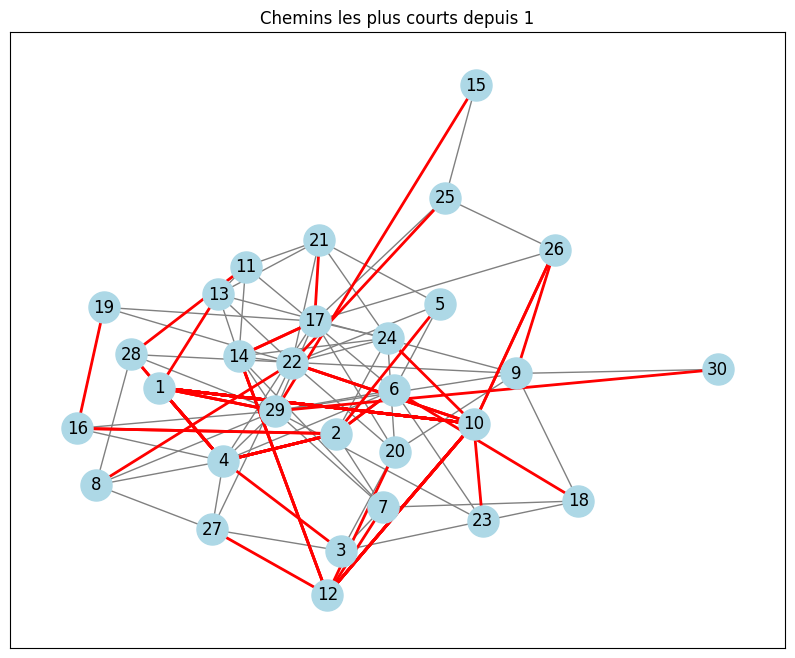

In [19]:
def visualize_shortest_paths(graph, start_vertex, previous_nodes):
    pos = nx.spring_layout(graph)  # Layout pour les nœuds
    plt.figure(figsize=(10, 8))

    # Dessiner le graphe
    nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_labels(graph, pos)
    nx.draw_networkx_edges(graph, pos, edge_color='gray')

    # Dessiner les chemins les plus courts
    for target in graph.nodes:
        if target != start_vertex:
            path = []
            while target is not None:
                path.insert(0, target)
                target = previous_nodes[target]
            edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
            nx.draw_networkx_edges(graph, pos, edgelist=edges, edge_color='red', width=2.0)

    plt.title(f"Chemins les plus courts depuis {start_vertex}")
    plt.show()

# Appel de la fonction de visualisation pour 'A'
visualize_shortest_paths(G, 1, previous_nodes)


### Visualisation pour PuLP

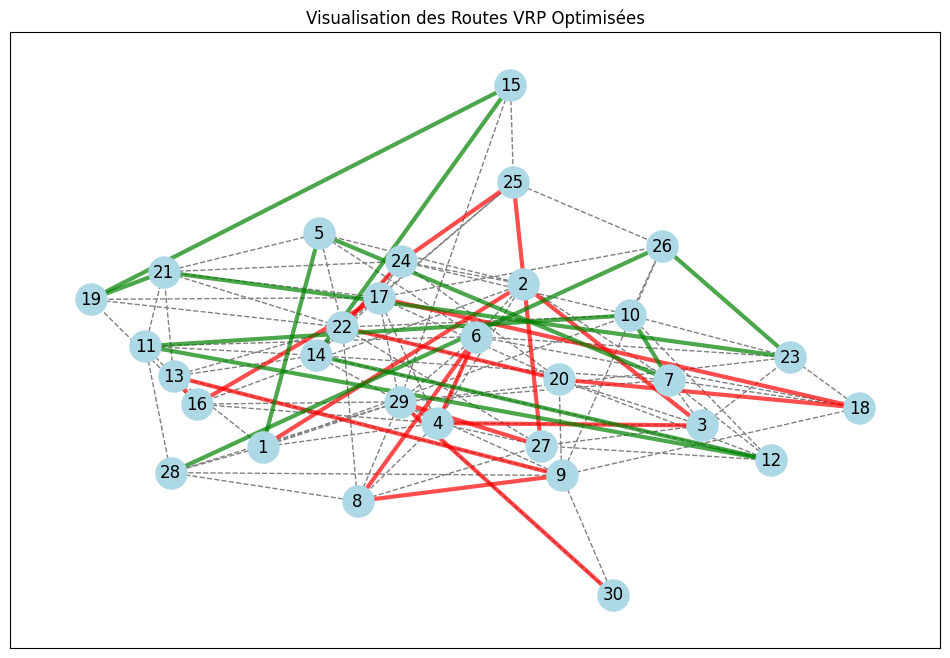

In [20]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_vrp_routes(graph, routes, node_positions=None):
    if node_positions is None:
        node_positions = nx.spring_layout(graph)  # Générer des positions s'il n'y en a pas

    plt.figure(figsize=(12, 8))
    # Dessiner tous les nœuds du graphe
    nx.draw_networkx_nodes(graph, node_positions, node_color='lightblue', node_size=500)
    nx.draw_networkx_labels(graph, node_positions)
    nx.draw_networkx_edges(graph, node_positions, edge_color='gray', style='dashed')

    colors = ['red', 'green', 'blue', 'purple', 'orange']  # Couleurs pour distinguer les routes des différents véhicules

    # Parcourir chaque route dans la liste des routes
    for idx, route in enumerate(routes):
        if route:  # Vérifie que la route n'est pas vide
            route_edges = [(route[i][0], route[i+1][0]) for i in range(len(route)-1)]
            # Dessiner les arêtes de la route actuelle avec une couleur spécifique
            nx.draw_networkx_edges(graph, node_positions, edgelist=route_edges, edge_color=colors[idx % len(colors)], width=3, alpha=0.7)

    plt.title("Visualisation des Routes VRP Optimisées")
    plt.show()

# Utilisation de la fonction de visualisation avec pulp_routes
visualize_vrp_routes(G, pulp_routes)

### Validation des Algorithmes
Nous avons implémenté et testé trois algorithmes différents pour résoudre le problème de tournées de véhicules (VRP). Voici un résumé de la performance et des résultats obtenus pour chaque méthode.

### PSO (Particle Swarm Optimization)
Les tests de l'algorithme PSO montrent que cette méthode peut trouver des solutions proches de l'optimum en un temps raisonnable pour des instances de taille moyenne. Cependant, la qualité des solutions peut varier en fonction des paramètres de l'algorithme, tels que la taille de la population et le nombre d'itérations.

### Dijkstra
L'algorithme de Dijkstra, modifié pour les contraintes de fenêtre de temps, a été utilisé pour trouver les chemins les plus courts entre les villes. Bien que cet algorithme soit efficace pour des graphes de petite à moyenne taille, il peut devenir moins performant pour des graphes très denses ou de grande taille.

### PuLP et le Solveur Simplex
L'optimisation avec PuLP et le solveur Simplex a permis de trouver des solutions optimales pour des instances de taille petite à moyenne. Cette méthode est particulièrement utile pour vérifier la qualité des solutions trouvées par les heuristiques comme PSO. Cependant, elle peut être limitée par les ressources de calcul disponibles pour des instances de grande taille.

### Analyse des Résultats
Les résultats des différents algorithmes montrent une complémentarité intéressante. Les heuristiques comme PSO peuvent fournir rapidement de bonnes solutions pour des instances de grande taille, tandis que les méthodes exactes comme le solveur Simplex de PuLP peuvent être utilisées pour valider ces solutions ou résoudre des instances plus petites de manière optimale.

## Conclusion
Ce projet a permis de mettre en œuvre et de comparer différentes méthodes pour résoudre le problème de tournées de véhicules (VRP). Les résultats montrent que chaque méthode a ses avantages et ses inconvénients en fonction de la taille et de la complexité des instances du problème.

### Contributions Principales
- **Algorithme PSO** : Efficace pour trouver rapidement des solutions de bonne qualité pour des instances de taille moyenne à grande.
- **Algorithme de Dijkstra** : Utile pour les chemins les plus courts, mais limité par la taille du graphe.
- **PuLP et Solveur Simplex** : Fournit des solutions optimales pour des instances de petite à moyenne taille et peut valider les solutions heuristiques.

### Perspectives Futures
Les travaux futurs pourraient inclure :
- L'amélioration des heuristiques pour les rendre plus efficaces pour des instances de très grande taille.
- L'intégration de méthodes de parallélisme pour accélérer les calculs.
- L'exploration de nouvelles contraintes et objectifs pour rendre le modèle plus réaliste et applicable à des scénarios réels de logistique urbaine.

Ce projet a démontré l'importance de l'optimisation algorithmique pour améliorer l'efficacité des systèmes de livraison, contribuant ainsi à la réduction des coûts et des impacts environnementaux.
